**PROJECT TITLE**

SENTIMENT ANALYSIS ON GOOGLE PAY REVIEWS


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **TOOLS & TECHNIQUES**

 1.**Python** Python progamming language as the primary tool for data perprocessing,analysis.

 2.**NLTK(Natural Language Toolkit)Libary**:NLTK will be used for various natural language prooessing tasks,including text preprocessing,tokenization,and potentially for sentiment analysis.

 3.**VADER Sentiment Analysis**: VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool. It will help me calculate sentiment scores for the googlepay reviews.

4.**Logistic Regression**: This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1

 .



# **Data-set description**

**Data Set Name**: googlepay Customer Reviews.csv

**Source**: Google Play Store

**Purpose**: Sentiment Analysis

**Format**: CSV (Comma-Separated Values)

**Size**:40000 rows × 6 columns(24000 datas)

# **Columns**:

1."source" The source of the review.

2."review_id" A unique identifier for each review.

3."user_name" The username of the person who left the review.

4."content" The main text of the review.

5."rating" The rating given by the user (e.g., 1 to 5 stars).

6."thumbs_up" The number of thumbs-up (likes) the review received.

7."appVersion" The version of the Google pay app that the user was using when they left the review.



In [3]:
import pandas as pd
# reading csv file
df=pd.read_csv("/content/drive/MyDrive/Data/googlepay Customer Reviews.csv")

In [4]:
#check size of data frame
df.shape

(40000, 6)

In [5]:
#check datashape of all columns
df.dtypes

reviewId         object
userName         object
text             object
rating            int64
thumbsUpCount     int64
appVersion       object
dtype: object

In [6]:
#check the count of null for each columns
df.isnull().sum()

reviewId            0
userName            0
text                1
rating              0
thumbsUpCount       0
appVersion       3758
dtype: int64

In [7]:
#describe method use for basic statistics for numerical data
df.describe()

,rating,thumbsUpCount
count,40000.000000,40000.000000
mean,3.870850,0.637000
std,1.600542,55.511205
min,1.000000,0.000000
25%,3.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,11020.000000


In [8]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/Data/googlepay Customer Reviews.csv")

# Drop rows where the "text" column contains NaN values
df.dropna(subset=['text'], inplace=True)

# Save the modified DataFrame to a new CSV file
df.to_csv("/content/drive/MyDrive/Data/preprocess1_reviews.csv", index=False)


In [9]:
df

,reviewId,userName,text,rating,thumbsUpCount,appVersion
0,93b531dc-13f6-43c2-a4f3-a2fd368f92dd,Mubashir Bacchi,Uninstall fast now I will install now this app,5,0,183.1.1 (arm64-v8a_release_flutter)
1,37910631-927f-4b02-94ed-583b137fec37,sudhir Harad,good,4,0,184.1.1 (arm64-v8a_release_flutter)
2,f9685a96-71c5-4262-87d7-0b5839c0ed1a,Ajit Behera,Very good,5,0,184.1.1 (arm64-v8a_release_flutter)
3,b8919d51-c40e-4cf3-8dc9-fbdfea58b725,Bharatkumar Chhaganlal Prajapati,"Little bit confused, some time not safe.",2,0,184.1.1 (arm64-v8a_release_flutter)
4,566197ed-cf0b-4811-b6ef-82072c78d680,Ankit Mangal,rewards are worthless,1,0,184.1.1 (arm64-v8a_release_flutter)
...,...,...,...,...,...,...
39995,2ac13067-daed-45b7-94fb-49f76bfb7dba,Aashta Singh,1stop,3,0,175.1.4 (arm64-v8a_release_flutter)
39996,d3347988-ec3d-48bf-b554-629cb4ad4b7f,Aman Chauhan,goosbumps,5,0,173.1.4 (arm64-v8a_release_flutter)
39997,dbfde7cd-29f1-4947-8848-e10a6e9647b3,Basiriya Parveen,Oooooob,1,0,140.1.3 (arm64-v8a_release_flutter)
39998,1988a0de-9920-4d8b-ae64-717f71138dce,Vishal Mittal,server down rhta h,3,0,175.1.4 (arm64-v8a_release_flutter)


In [10]:
df.isna().sum()

reviewId            0
userName            0
text                0
rating              0
thumbsUpCount       0
appVersion       3758
dtype: int64

In [11]:
pip install nltk

In [12]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 6.5 MB/s eta 0:00:00


In [13]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import emoji

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the CSV file
csv_file = "/content/drive/MyDrive/Data/preprocess1_reviews.csv"
df = pd.read_csv(csv_file)

#Define a function for text preprocessing
def preprocess_text(text):
    # Check for NaN and empty strings
    if pd.isna(text) or text == "":
        return ""

    # Step 1: Lowercasing
    text = text.lower()

    # Step 2: Removing HTML Tags
    text = re.sub(r'<.*?>', '', text)

    # Step 3: Tokenization and Symbol Removal
    tokens = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in word_tokenize(text)]

    # Step 4: Stop Word Removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Step 5: Handling Emojis and Emoticons
    tokens = [emoji.demojize(word) for word in tokens]

    # Step 6: Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Rejoin the processed tokens into a single string
    return ' '.join(tokens)

# Specify the columns containing text data to preprocess
columns_to_preprocess = ['text']

# Apply the preprocessing function to the specified columns
for col in columns_to_preprocess:
    df[col] = df[col].apply(preprocess_text)

# Combine the preprocessed text columns into a single text column
df['combined_text'] = df[columns_to_preprocess].apply(lambda x: ' '.join(x), axis=1)

# Save the preprocessed data to a new CSV file if needed
df.to_csv("/content/drive/MyDrive/Data/text_preprocessed.csv", index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
df

,reviewId,userName,text,rating,thumbsUpCount,appVersion,combined_text
0,93b531dc-13f6-43c2-a4f3-a2fd368f92dd,Mubashir Bacchi,uninstal fast instal app,5,0,183.1.1 (arm64-v8a_release_flutter),uninstal fast instal app
1,37910631-927f-4b02-94ed-583b137fec37,sudhir Harad,good,4,0,184.1.1 (arm64-v8a_release_flutter),good
2,f9685a96-71c5-4262-87d7-0b5839c0ed1a,Ajit Behera,good,5,0,184.1.1 (arm64-v8a_release_flutter),good
3,b8919d51-c40e-4cf3-8dc9-fbdfea58b725,Bharatkumar Chhaganlal Prajapati,littl bit confus time safe,2,0,184.1.1 (arm64-v8a_release_flutter),littl bit confus time safe
4,566197ed-cf0b-4811-b6ef-82072c78d680,Ankit Mangal,reward worthless,1,0,184.1.1 (arm64-v8a_release_flutter),reward worthless
...,...,...,...,...,...,...,...
39994,2ac13067-daed-45b7-94fb-49f76bfb7dba,Aashta Singh,1stop,3,0,175.1.4 (arm64-v8a_release_flutter),1stop
39995,d3347988-ec3d-48bf-b554-629cb4ad4b7f,Aman Chauhan,goosbump,5,0,173.1.4 (arm64-v8a_release_flutter),goosbump
39996,dbfde7cd-29f1-4947-8848-e10a6e9647b3,Basiriya Parveen,oooooob,1,0,140.1.3 (arm64-v8a_release_flutter),oooooob
39997,1988a0de-9920-4d8b-ae64-717f71138dce,Vishal Mittal,server rhta h,3,0,175.1.4 (arm64-v8a_release_flutter),server rhta h


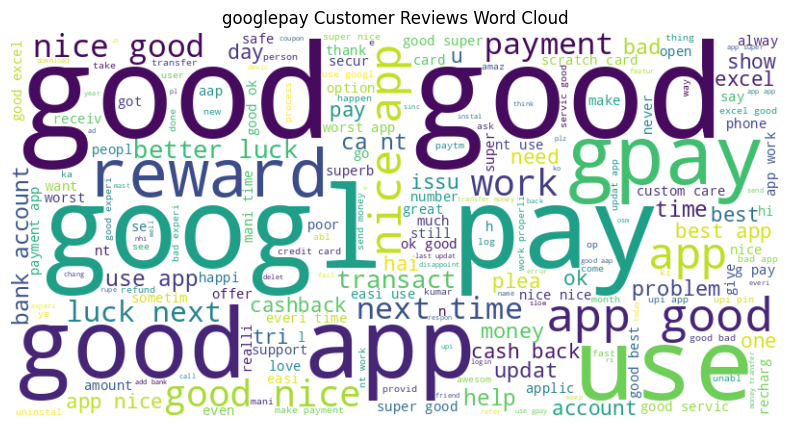

In [15]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the preprocessed data
csv_file = "/content/drive/MyDrive/Data/text_preprocessed.csv"
df = pd.read_csv(csv_file)

# Handle NaN values in the 'combined_text' column and convert them to empty strings
df['combined_text'] = df['combined_text'].fillna('')

# Combine preprocessed text from all reviews into a single string
all_reviews_text = ' '.join(df['combined_text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("googlepay Customer Reviews Word Cloud")
plt.show()

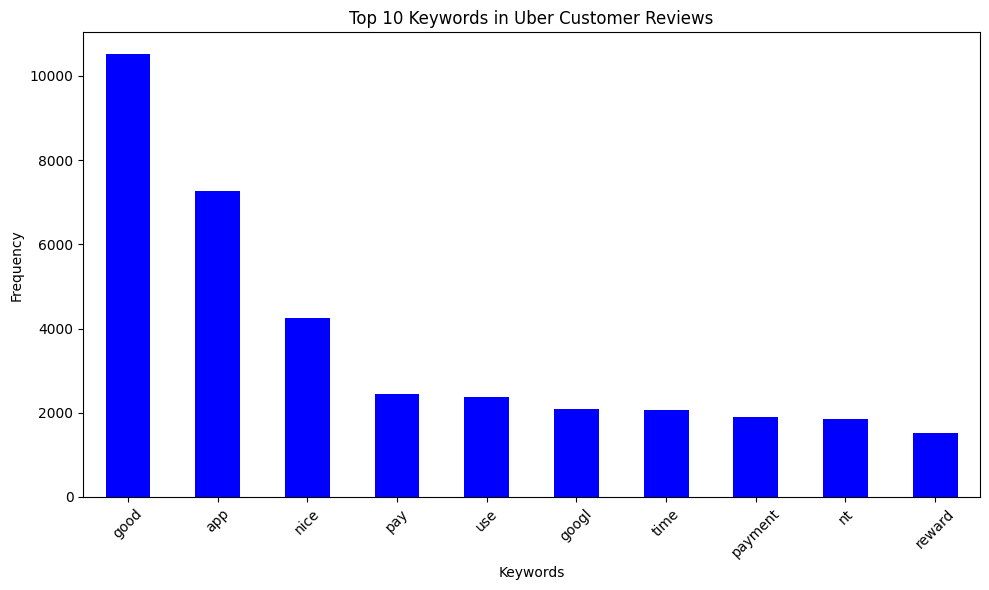

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed data
csv_file = "/content/drive/MyDrive/Data/text_preprocessed.csv"
df = pd.read_csv(csv_file)

# Handle NaN values in the 'combined_text' column and convert them to empty strings
df['combined_text'] = df['combined_text'].fillna('')

# Combine preprocessed text from all reviews into a single string
all_reviews_text = ' '.join(df['combined_text'])

# Tokenize the text into words
words = all_reviews_text.split()

# Create a frequency distribution of words
word_freq = pd.Series(words).value_counts()

# Set the number of top keywords you want to display in the bar chart
top_n_keywords = 10  # Adjust this number as needed

# Get the top keywords
top_keywords = word_freq.head(top_n_keywords)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_keywords.plot(kind='bar', color='blue')
plt.title(f'Top {top_n_keywords} Keywords in Uber Customer Reviews')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Data/text_preprocessed.csv')

#  mention the column that contain text
text_column = 'combined_text'

# Replace missing values with empty strings
df[text_column].fillna('', inplace=True)

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores using VADER
def get_sentiment_score(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Apply the sentiment analysis function to the preprocessed text column
df['sentiment'] = df[text_column].apply(get_sentiment_score)

# Extract the compound sentiment score (a single value representing overall sentiment)
df['compound_sentiment'] = df['sentiment'].apply(lambda x: x['compound'])

# Define a threshold for sentiment labels (you can adjust this threshold as needed)
threshold = 0.1

# Categorize sentiment based on the threshold
df['sentiment_label'] = df['compound_sentiment'].apply(
    lambda score: 'positive' if score > threshold else ('negative' if score < -threshold else 'neutral')
)

# Define a function to map sentiment labels to numerical values
def map_sentiment_to_numeric(sentiment_label):
    if sentiment_label == 'positive':
        return 1
    elif sentiment_label == 'neutral':
        return 0
    elif sentiment_label == 'negative':
        return -1
    else:
        return None  # Handle any other values if necessary

# Apply the mapping function to the 'sentiment_label' column
df['numeric_sentiment'] = df['sentiment_label'].apply(map_sentiment_to_numeric)

# Save the DataFrame with sentiment labels and numeric sentiment to a new CSV file
df.to_csv('/content/drive/MyDrive/Data/preprocessed_data_with_sentiment.csv', index=False)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [18]:
df

,reviewId,userName,text,rating,thumbsUpCount,appVersion,combined_text,sentiment,compound_sentiment,sentiment_label,numeric_sentiment
0,93b531dc-13f6-43c2-a4f3-a2fd368f92dd,Mubashir Bacchi,uninstal fast instal app,5,0,183.1.1 (arm64-v8a_release_flutter),uninstal fast instal app,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,0
1,37910631-927f-4b02-94ed-583b137fec37,sudhir Harad,good,4,0,184.1.1 (arm64-v8a_release_flutter),good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive,1
2,f9685a96-71c5-4262-87d7-0b5839c0ed1a,Ajit Behera,good,5,0,184.1.1 (arm64-v8a_release_flutter),good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive,1
3,b8919d51-c40e-4cf3-8dc9-fbdfea58b725,Bharatkumar Chhaganlal Prajapati,littl bit confus time safe,2,0,184.1.1 (arm64-v8a_release_flutter),littl bit confus time safe,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...",0.4404,positive,1
4,566197ed-cf0b-4811-b6ef-82072c78d680,Ankit Mangal,reward worthless,1,0,184.1.1 (arm64-v8a_release_flutter),reward worthless,"{'neg': 0.439, 'neu': 0.0, 'pos': 0.561, 'comp...",0.2023,positive,1
...,...,...,...,...,...,...,...,...,...,...,...
39994,2ac13067-daed-45b7-94fb-49f76bfb7dba,Aashta Singh,1stop,3,0,175.1.4 (arm64-v8a_release_flutter),1stop,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,0
39995,d3347988-ec3d-48bf-b554-629cb4ad4b7f,Aman Chauhan,goosbump,5,0,173.1.4 (arm64-v8a_release_flutter),goosbump,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,0
39996,dbfde7cd-29f1-4947-8848-e10a6e9647b3,Basiriya Parveen,oooooob,1,0,140.1.3 (arm64-v8a_release_flutter),oooooob,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,0
39997,1988a0de-9920-4d8b-ae64-717f71138dce,Vishal Mittal,server rhta h,3,0,175.1.4 (arm64-v8a_release_flutter),server rhta h,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,0


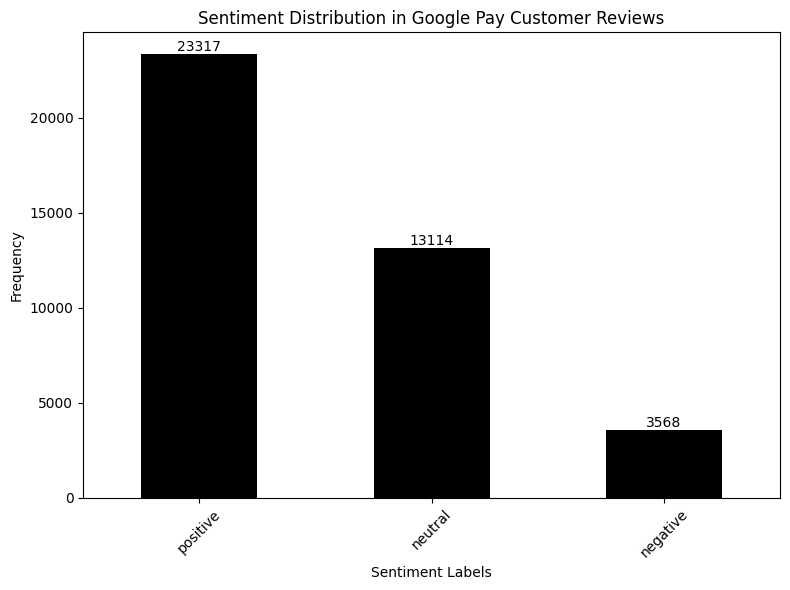

In [19]:
from pandas.core.series import Frequency
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed data with sentiment labels
csv_file = "/content/drive/MyDrive/Data/preprocessed_data_with_sentiment.csv"
df = pd.read_csv(csv_file)


# Count the number of reviews in each sentiment category
sentiment_counts = df['sentiment_label'].value_counts()


# Create a bar chart
plt.figure(figsize=(8, 6))
ax = sentiment_counts.plot(kind='bar', color='black')

# Set chart title and labels
plt.title('Sentiment Distribution in Google Pay Customer Reviews')
plt.xlabel('Sentiment Labels')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Ensure that the labels fit within the figure area
plt.tight_layout()

# Add data labels on top of each bar
for i, v in enumerate(sentiment_counts):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Display the chart
plt.show()



In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score


# Load the preprocessed data with sentiment labels
csv_file = "/content/drive/MyDrive/Data/preprocessed_data_with_sentiment.csv"
df = pd.read_csv(csv_file)

#remove Nan values
df.dropna(subset=['combined_text'], inplace=True)

# Split the data into training and testing sets
X = df['combined_text']
y = df['numeric_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer for text data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#Initialize and train the Logistic Regression model
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train_tfidf, y_train)

# Predict sentiment on the test data
y_pred = logistic_reg_model.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

          -1       0.92      0.82      0.87       712
           0       0.92      0.98      0.95      2380
           1       0.99      0.97      0.98      4674

    accuracy                           0.96      7766
   macro avg       0.94      0.93      0.93      7766
weighted avg       0.96      0.96      0.96      7766



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
accuracy_score (y_test, y_pred)


0.9614988411022405